**log-001 Notebook for a learning-from-time-series situation**
**(the 2020 COVID-19 case)**

**1. Import general packages required**

In [1]:
# 0. Importing general packages 
import sys                                         # Python ≥3.5 is required
assert sys.version_info >= (3, 5)
import sklearn                              # Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"
                                                            # Common imports
import pandas as pd                                #Pandas (data management)
import numpy as np                                 #Numpy (math operatiomns)
import os                                    #OS for operating system access
                                                    # To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator) 
                             # Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

**2. Read raw dataframe from internet and store it locally (pickle) when required**

In [2]:
import io
import requests
        # For the EU: 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
        #read the DataFrame from URL? 
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
txt = "\n ... MAY TAKE SOME CONSIDERABLE TIME ...  \n yes/no: "
question = "Read from " + url + txt 
if input(question) == "yes":
    print("... reading from " + url + " ...")   
    s = requests.get(url).content               #Prepare reading from URL
    source = io.StringIO(s.decode('utf-8'))     #
    df = pd.read_csv(source,                    #Read from URL into Pandas DataFrame
        header = 0,                             #Read from URL
        index_col = "dateRep",                  #Read from URL
        squeeze = False,                        #Read from URL
        usecols = ["dateRep",                   #Read from URL
                   "countryterritoryCode",      #Read from URL
                   "cases_weekly",              #Read from URL
                   "deaths_weekly",             #Read from URL
                   "popData2019"])              #Read from URL
    df.fillna(0)  
    df.info()
    df.to_pickle("df.pkl")                      #Write to pickled file
else:
    df = pd.read_pickle("df.pkl")
    df.info()


Read from https://opendata.ecdc.europa.eu/covid19/casedistribution/csv
 ... MAY TAKE SOME CONSIDERABLE TIME ...  
 yes/no: yes
... reading from https://opendata.ecdc.europa.eu/covid19/casedistribution/csv ...
<class 'pandas.core.frame.DataFrame'>
Index: 9151 entries, 21/12/2020 to 23/03/2020
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cases_weekly          9151 non-null   int64  
 1   deaths_weekly         9151 non-null   int64  
 2   countryterritoryCode  9132 non-null   object 
 3   popData2019           9132 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 357.5+ KB


**3. Select countries & do per country: 
                        prepare & plot & collect axes for post processing**

Save figures in .svg files? yes/no yes

The figure for NLD saved in .svg file ...

The figure for GBR saved in .svg file ...

The figure for DEU saved in .svg file ...

The figure for BEL saved in .svg file ...

The figure for FRA saved in .svg file ...

The figure for ESP saved in .svg file ...

The figure for ITA saved in .svg file ...

The figure for GRC saved in .svg file ...

The figure for POL saved in .svg file ...

The figure for BLR saved in .svg file ...

The figure for UKR saved in .svg file ...

The figure for ROU saved in .svg file ...

GOODBYE!



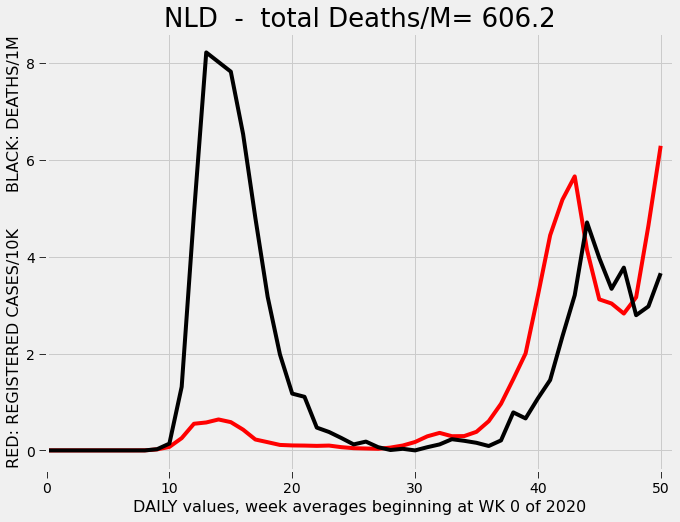

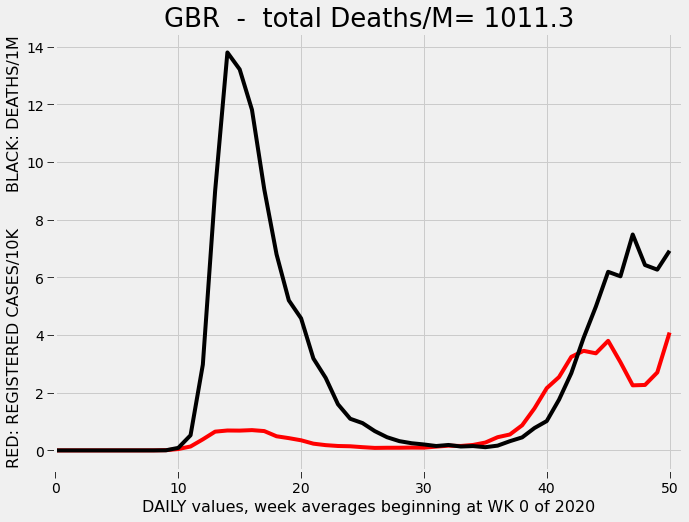

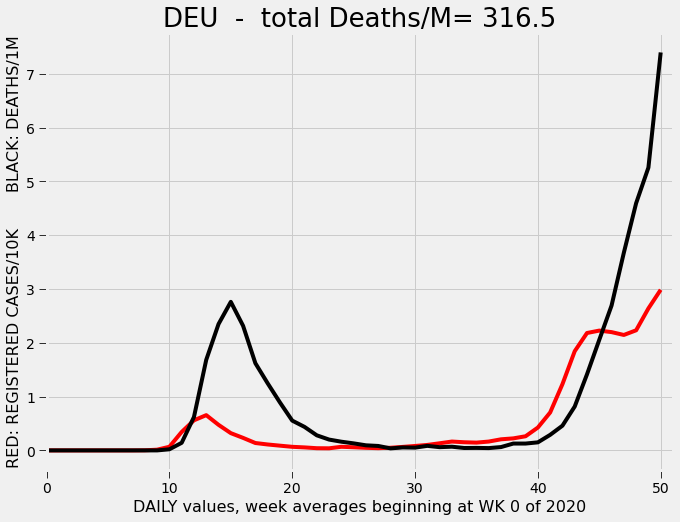

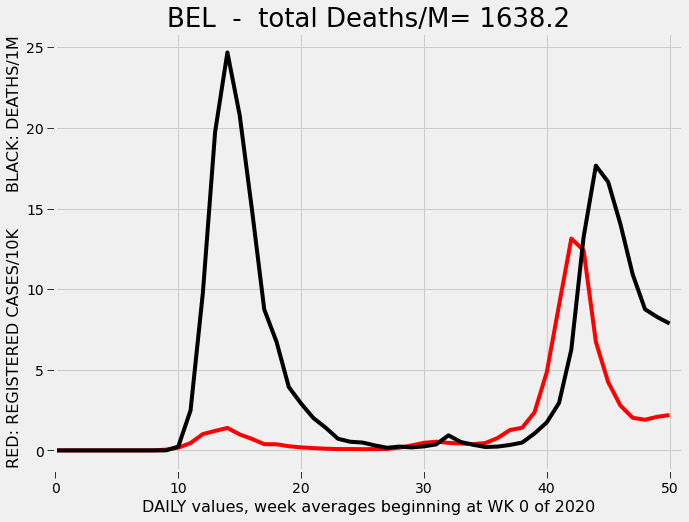

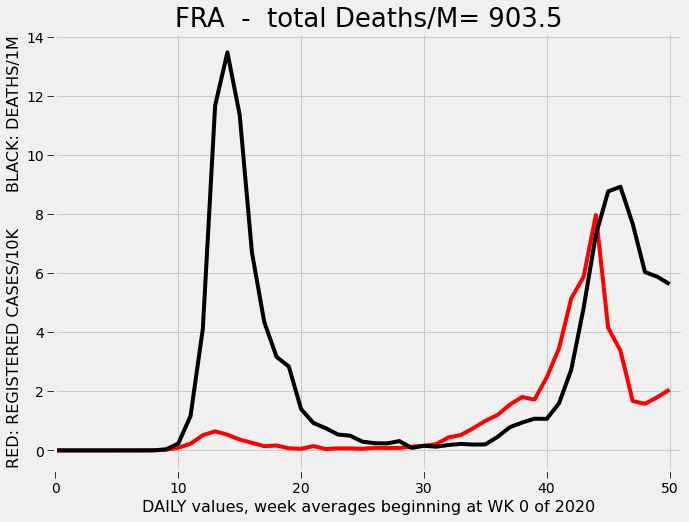

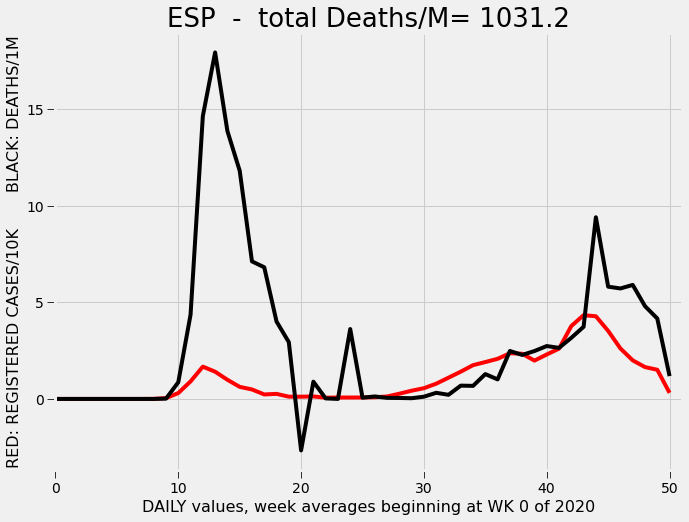

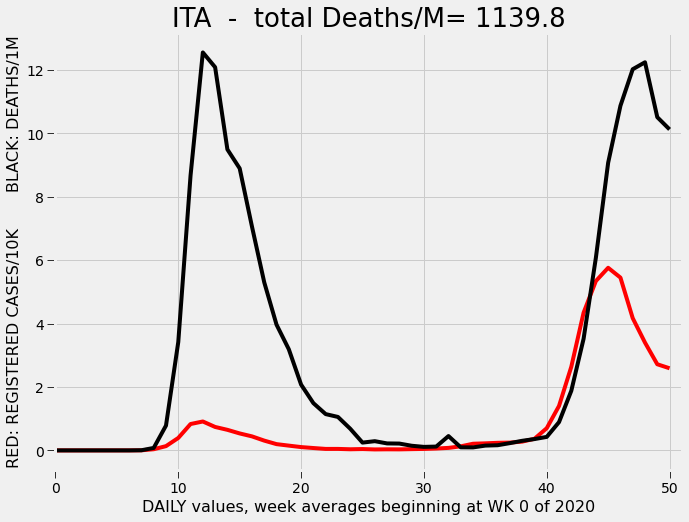

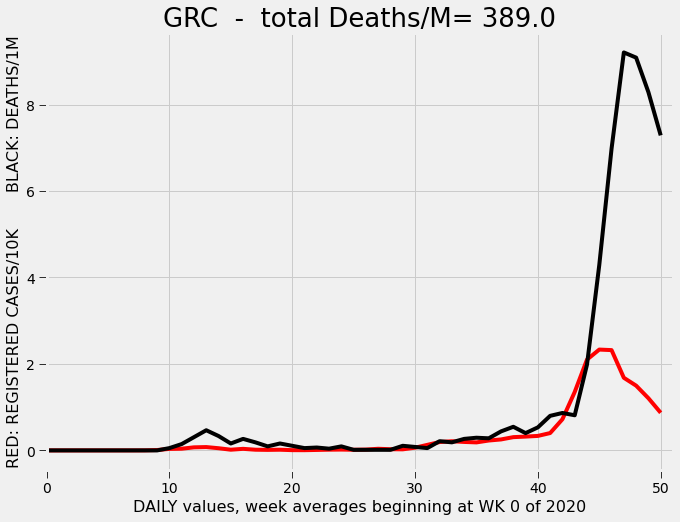

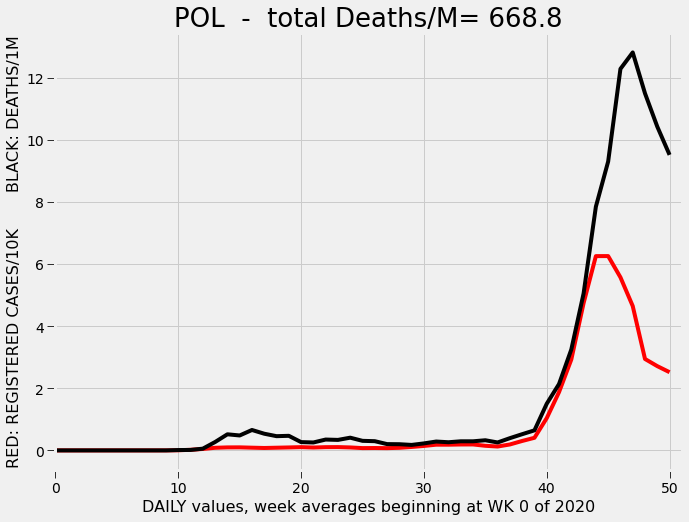

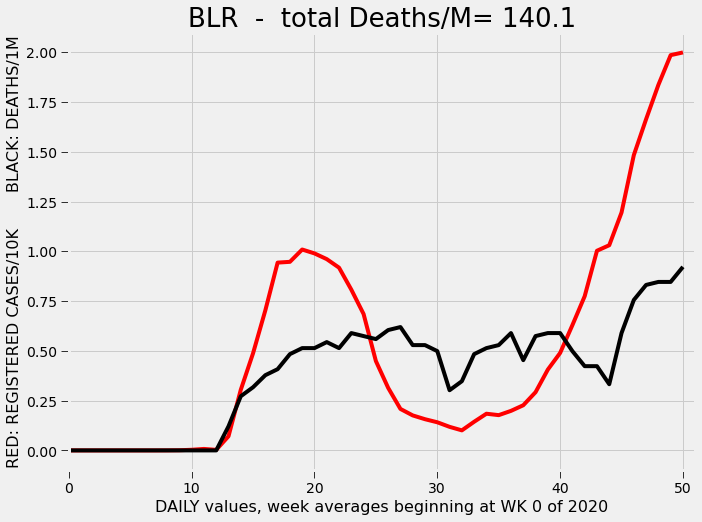

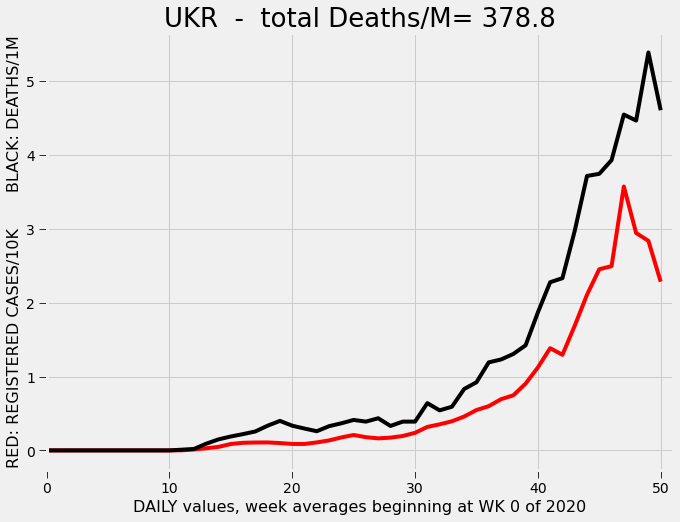

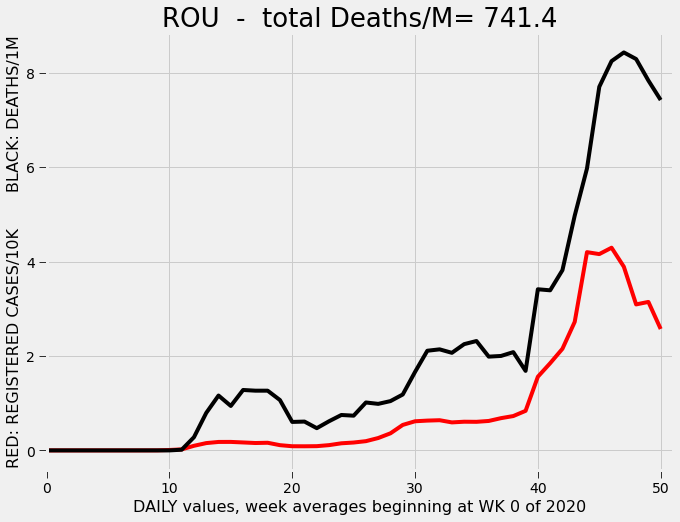

In [3]:
#Egalize and set the scope -- assumtion: China data availabiolity is the standard 
TheStandard = df[df['countryterritoryCode'] == 'CHN'][::-1].copy() 
TheStandard.index.sort_values(ascending=False)
TheStandard = TheStandard.rename_axis('dateRep').reset_index() #make index also a variable
x0 = TheStandard["dateRep"].index
#----------------------------------------------------------------------------------
xmax = len(x0)
xfirst = 0              #======================= adapt here if required (week number)
xlast  = xmax           #======================= adapt here if required (week number)
#-----------------------------------------------------------------------------------
#set the collection of countries you wish to analyze
#ANTI-CYCLIC
#countries = ['NLD','BEL','AUT', 'DEU', 'SWE','GBR','FRA','ITA','ESP','GRC']
#FRAGMENTED
#countries = ['USA','BRA','ZAF']
#CONTROL-ORIENTED
#countries = ['NZL','KOR', 'CHN' ]
#SANDBOX
countries = ['NLD','GBR','DEU','BEL','FRA','ESP','ITA','GRC','POL','BLR','UKR','ROU'] #Europe
countries = ['NZL','AUS','KOR','JPN','SGP','THA','PHL','CHN','VNM','KHM','MYS','MMR'] #East
countries = ['PAK','AFG','IRN','IRQ','SYR','ARE','OMN','MAR','LBN','TUN','EGY','DZA'] #Levant+
countries = ['USA','MEX','BRA','VEN','ARG','CHL','PER','ECU','BOL','PRY','URY','COL'] #Americas
countries = ['SOM','ERI','ETH','SDN','NER','NGA','UGA','KEN','SEN','MLI','TZA','ZMB'] #Africa
countries = ['AGO','MOZ','ZWE','BWA','MDG','CAN','TUR','ISR','YEM','IDN','IND','NPL'] #Outliers

############   INSERT THE LIST WITH COUNTRY CODES TO INVESTIGATE  

countries = ['NLD','GBR','DEU','BEL','FRA','ESP','ITA','GRC','POL','BLR','UKR','ROU'] #Europe

############   ASK ABOUT SAVING THE PLOTS  

question = "Save figures in .svg files? yes/no " 
if input(question) == "yes":
    saveplot = True
else:
    saveplot = False

############   FIX THE RANGE OF WEEK-NUMBERS AND COMPANION INDEX-DATES 
                                   # USE Cina for the pandemic's scope
INTERMEDIATERESULTS = []

for countryname in countries:                # [::-1] invert sequence
    country = df[df['countryterritoryCode'] == countryname][::-1].copy()
    pop = country['popData2019'].copy()[-1]  # get the population size
    country.index.sort_values(ascending=False)
    country = country.rename_axis('dateRep').reset_index() #make index also a variable    
    ynow0 = country["cases_weekly"]
    ynow1 = country["deaths_weekly"]
    diff = len(x0) - len(ynow0)
    extra = []
    if diff > 0 :    
        for x in range(0,diff):
            extra.append(0.0)
    ynow0 = list(extra) + list(ynow0)
    ynow1 = list(extra) + list(ynow1)      
    #----------------------------------------------------------------------------------
    factor0 = 10                                     #=================================
    factor0a = 100                                   #=================================
    #----------------------------------------------------------------------------------
    factor1 = 1                                      #now recompute the vectors to plot
    factor2 = 1                                      #now recompute the vectors to plot
    cumulativedeaths = 0                             #now recompute the vectors to plot
    
    y0a = []                            #CASES per DAY per MILLION / 100
    for q in ynow0:  
        cpdip = int(q) / 7                                #cases per day in population
        cpdpm = (cpdip / pop) * 1_000_000             #cases per day per million
        cdpmproc = cpdpm / factor0a                  #cases per day per million
        y0a.append(cdpmproc)                         #now recompute the vectors to plot     
    y1a = []                            #DEATHS per DAY per MILLION (raw)
    for q in ynow1:                                     
        dpdip = int(q) / 7                                #deaths per day in population
        dpdpm = (dpdip / pop) * 1000_000             #deaths per day per million
        y1a.append(dpdpm)                        #now recompute the vectors to plot
    y2a = []                            #CUMULATIVE DEATHS per MILLION / number of weeks
    for q in ynow1:                                     
        dtwip = int(q)                                    #deaths this week in population   
        dtwpm = (dtwip / pop) * 1_000_000            #per million, 
        cumulativedeaths = cumulativedeaths + dtwpm  #now recompute the vectors to plot  
        y2a.append(cumulativedeaths)                 #now recompute the vectors to plot
    cdpm = y2a[-1]
               
    #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot 
    # one plot per country with 
      
    plt.style.use('fivethirtyeight')   
    fig = plt.figure(figsize=(10, 8))
    plt.gcf().subplots_adjust(bottom=0.12)
    #plt.tight_layout()
    
    ax1 = fig.add_subplot(1,1,1)
    
    #plt.subplots_adjust(left=1, bottom=1, right=2, top=2, wspace=1, hspace=1)   
    plt.subplots_adjust()
    
    ax1.tick_params(axis='x',which='major',direction='out',bottom=True,length=5, size = 8)
    ax1.tick_params(axis='y',which='major',direction='out',size = 8)

    ax1.set_title(countryname + "  -  total Deaths/M= " + str(round(cdpm,1)), fontsize = 26)
    ax1.set_xlim([xfirst,xlast])
    ax1.set_ylabel('RED: REGISTERED CASES/10K       BLACK: DEATHS/1M', fontsize = 16)
    ax1.set_xlabel('DAILY values, week averages beginning at WK ' + str(xfirst) + ' of 2020', fontsize = 16)

    colors = ['black', 'brown']
    interim = [[countryname,'red',y0a],[countryname,'black',y1a]]  
    for i in interim :
        name = i[0]
        y3 = i[2]
        clr = i[1]
        ax1.tick_params()
        ax1.plot(x0,y3, color=clr, label = name)
    
    INTERMEDIATERESULTS.append([countryname,y2a])

    question = "Save figures in .svg files? yes/no " 
    if saveplot == True:
        plotfilename = countryname + " " + str(xfirst) + " - " + str(xlast) + ".svg"  
        fig.savefig(plotfilename,format="svg")
        print("\nThe figure for " + countryname + " saved in .svg file ...") 
    else:
        print("\nThe figure for " + countryname + " not saved in a file ...") 

print("\nGOODBYE!\n")


The figure for ['NLD', 'GBR', 'DEU', 'BEL', 'FRA', 'ESP', 'ITA', 'GRC', 'POL', 'BLR', 'UKR', 'ROU'] is saved in .svg file ...


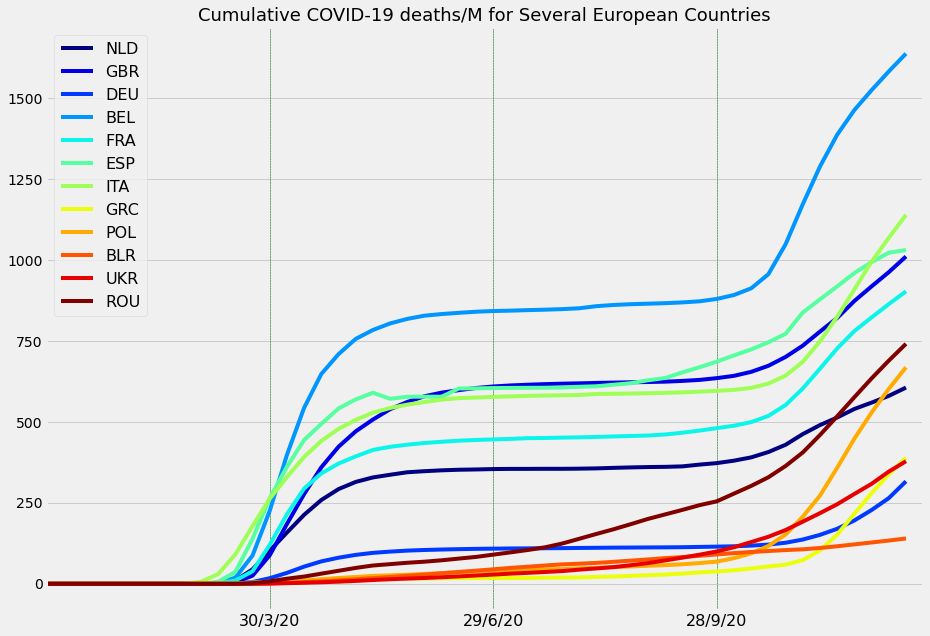

In [4]:
#INTERMEDIATERESULTS.append([countryname,y2a])

#plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot  #plot 
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(INTERMEDIATERESULTS))))
    
#from matplotlib.ticker import FuncFormatter
txt3 = " Cumulative deaths/M per country" 
    

fig1 = plt.figure(figsize=(14, 10))
axe = fig1.add_subplot(1,1,1)
plt.style.use('fivethirtyeight')
plt.rc('legend',fontsize=16)

xxx = str(countries)
axe.set_title("Cumulative COVID-19 deaths/M for Several European Countries", fontsize = 18)
axe.set_xlim([xfirst,xlast])
axe.axvline(x = 13, color = 'g', linestyle = '--', linewidth = 0.5 )
axe.axvline(x = 26, color = 'g', linestyle = '--', linewidth = 0.5 )
axe.axvline(x = 39, color = 'g', linestyle = '--', linewidth = 0.5 )
axe.set_xticks((13, 26, 39)) 
axe.set_xticklabels(('30/3/20', '29/6/20', '28/9/20'), fontsize = 16)

name, color = axe.get_legend_handles_labels()
for i in INTERMEDIATERESULTS:
    name = i[0]
    y3 = i[1]
    clr = next(colors)
    axe.plot(x0,y3, color=clr, label = name)
    plt.legend(loc="upper left")

plotfilename = xxx + ".svg"  
fig1.savefig(plotfilename)
print("\nThe figure for " + xxx + " is saved in .svg file ...") 


**Specify (list with country codes of countries to investigate**
(adapt this for different runs)
(an .svg file named by countrycode will be stored for each run)

Here is a list of countrycodes:

L0  = ['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI'] \
L1  = ['BEL', 'BEN', 'BES', 'BGD', 'BGR', 'BHS', 'BIH', 'BLR', 'BMU', 'BOL', 'BFA', 'BRA'] \
L2  = ['BRB', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CMR', 'COD', 'COL', 'CRI'] \
L3  = ['CUB', 'CUW', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI'] \
L4  = ['ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA'] \
L5  = ['GIB', 'GIN', 'GMB', 'GRC', 'GRL', 'GTM',  'GUY', 'HKG', 'HND', 'HRV', 'HTI'] \
L6  = ['HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR'] \
L7  = ['JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LBN', 'LBR', 'LBY', 'LIE', 'LKA'] \
L8  = ['LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MLI', 'MLT', 'MMR']\
L9  = ['MOZ', 'MWI', 'MYS', 'NAM', 'NCL', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL']\
L10 = ['OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRT', 'PRY', 'PSE'] \
L11 = ['PYF', 'QAT', 'ROU', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 'SLV'] \
L12 = ['SMR', 'SOM', 'SRB', 'SSD', 'SUR', 'SVK', 'SVN', 'SWE', 'SYR', 'TCD', 'TGO', 'THA'] \
L13 = [ 'TUN', 'TUR', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'UZB', 'VEN', 'VNM'] \
L14 = ['YEM', 'ZAF', 'ZMB', 'ZWE']

plt.style.available:
['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']
